In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
calories_file = r'C:\Users\prajw\OneDrive\Desktop\fit project\calories.csv'
exercise_file = r'C:\Users\prajw\OneDrive\Desktop\fit project\exercise.csv'

In [5]:
calories_df = pd.read_csv(r'C:\Users\prajw\OneDrive\Desktop\fit project\calories.csv')  
exercise_df = pd.read_csv(r'C:\Users\prajw\OneDrive\Desktop\fit project\exercise.csv')

In [6]:
if 'User_ID' in calories_df.columns and 'User_ID' in exercise_df.columns:
    fitness_data = pd.merge(exercise_df, calories_df, on='User_ID', how='outer')
    fitness_data.drop(columns='User_ID', inplace=True)
else:
    raise ValueError("No common column found for merging. Please check the CSV files.")

In [7]:
fitness_data['BMI'] = fitness_data['Weight'] / ((fitness_data['Height'] / 100) ** 2)
fitness_data['BMI'] = round(fitness_data['BMI'], 2)

In [8]:
fitness_data = fitness_data.dropna(subset=['Calories'])

In [9]:
features = [col for col in ['Gender', 'Age', 'BMI', 'Duration', 'Heart_Rate', 'Body_Temp'] if col in fitness_data.columns]

target = 'Calories'

In [10]:
print(fitness_data.columns)


Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories', 'BMI'],
      dtype='object')


In [11]:
if 'Weight' in fitness_data.columns and 'Height' in fitness_data.columns:
    fitness_data['BMI'] = fitness_data['Weight'] / ((fitness_data['Height'] / 100) ** 2)
    fitness_data['BMI'] = round(fitness_data['BMI'], 2)
else:
    print("Weight or Height column missing, skipping BMI calculation.")


In [12]:
print(calories_df.columns)
print(exercise_df.columns)


Index(['User_ID', 'Calories'], dtype='object')
Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')


In [13]:
fitness_data = fitness_data.dropna(subset=['Calories'])

In [14]:
feature_candidates = ['Gender', 'Age', 'BMI', 'Duration', 'Heart_Rate', 'Body_Temp']
available_features = [col for col in feature_candidates if col in fitness_data.columns]
target = 'Calories'

In [15]:
fitness_targets = [col for col in ['Calories', 'Heart_Rate', 'BMI'] if col in fitness_data.columns]


In [16]:

if not available_features:
    raise ValueError("No valid features found for model training. Check dataset columns.")

In [17]:
if not fitness_targets:
    raise ValueError("No valid targets found for fitness tracking. Check dataset columns.")


In [18]:
if 'Gender' in fitness_data.columns:
    fitness_data = pd.get_dummies(fitness_data, columns=['Gender'], drop_first=True)

In [19]:
models = {}
metrics_results = {}

In [20]:
for target in fitness_targets:
    X = fitness_data[available_features]
    y = fitness_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

KeyError: "['Gender'] not in index"

In [ ]:
model = RandomForestRegressor(n_estimators=1000, max_features=3, max_depth=6, random_state=1)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=6, max_features=3, n_estimators=1000,
                      random_state=1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R² Score: 0.99
Mean Absolute Error: 0.07
Root Mean Squared Error: 0.13


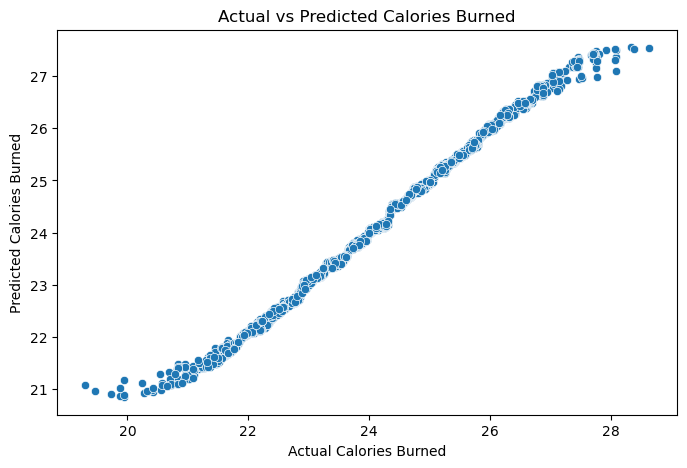

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Calories Burned")
plt.ylabel("Predicted Calories Burned")
plt.title("Actual vs Predicted Calories Burned")
plt.show()

In [ ]:
exercise_df = exercise_df.merge(calories_df, on='User_ID')

In [ ]:
exercise_df.drop(columns='User_ID', inplace=True)

In [ ]:
print(exercise_df.head())

   Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0    male   68   190.0    94.0      29.0       105.0       40.8     231.0
1  female   20   166.0    60.0      14.0        94.0       40.3      66.0
2    male   69   179.0    79.0       5.0        88.0       38.7      26.0
3  female   34   179.0    71.0      13.0       100.0       40.5      71.0
4  female   27   154.0    58.0      10.0        81.0       39.8      35.0


In [27]:
merged_df = pd.merge(calories_df, exercise_df, on='User_ID', how='inner')


In [28]:
df = pd.merge(exercise_df, calories_df, on="User_ID")


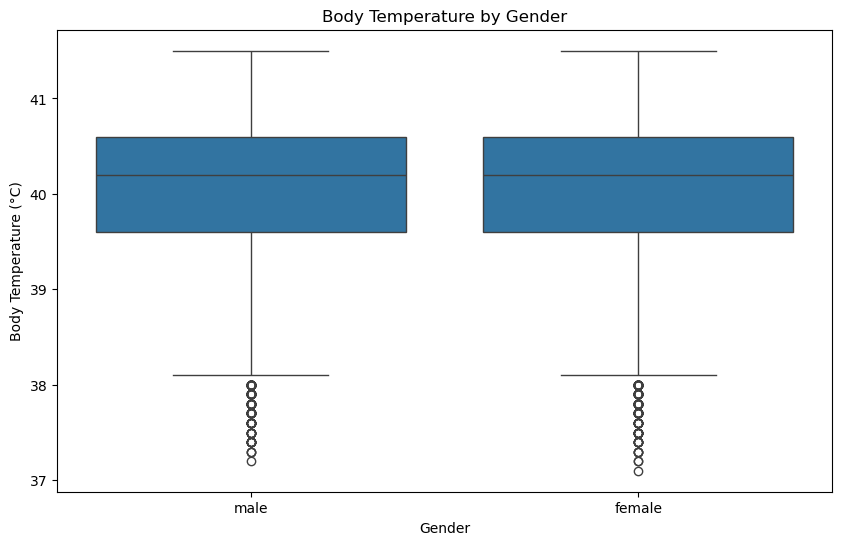

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Body_Temp', data=df)
plt.title('Body Temperature by Gender')
plt.xlabel('Gender')
plt.ylabel('Body Temperature (°C)')
plt.show()

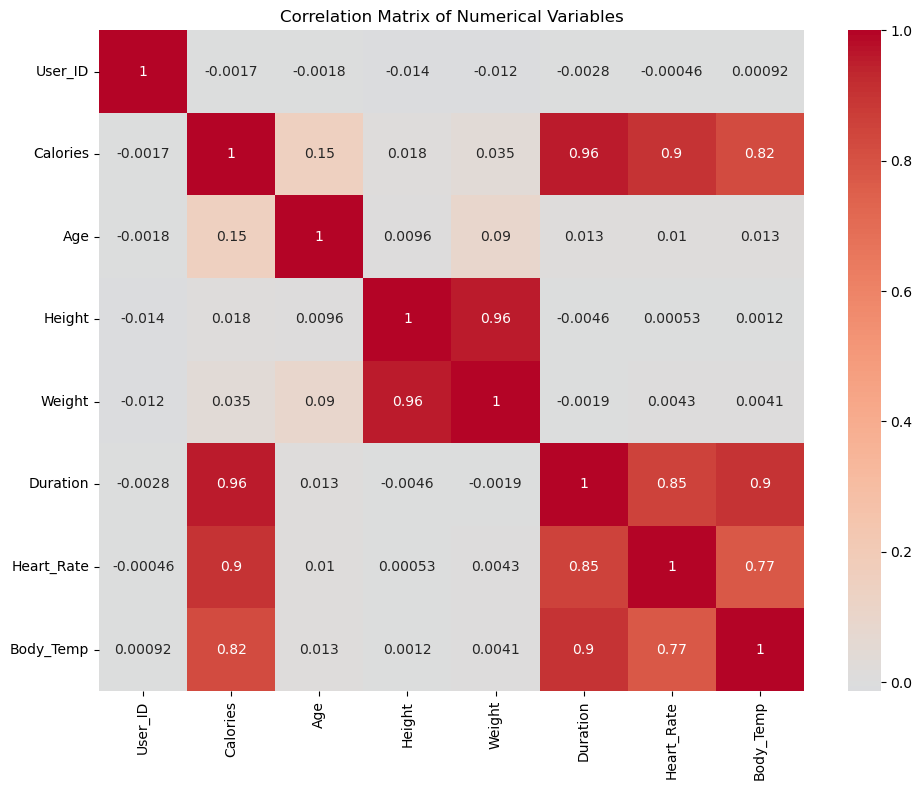

In [30]:
plt.figure(figsize=(10, 8))
correlation_matrix = merged_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()


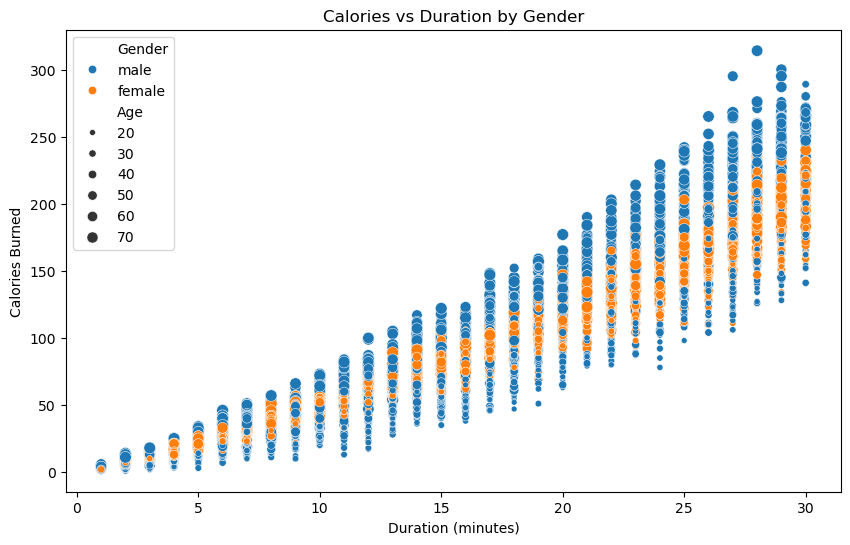

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Duration', y='Calories', hue='Gender', size='Age')
plt.title('Calories vs Duration by Gender')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories Burned')
plt.show()


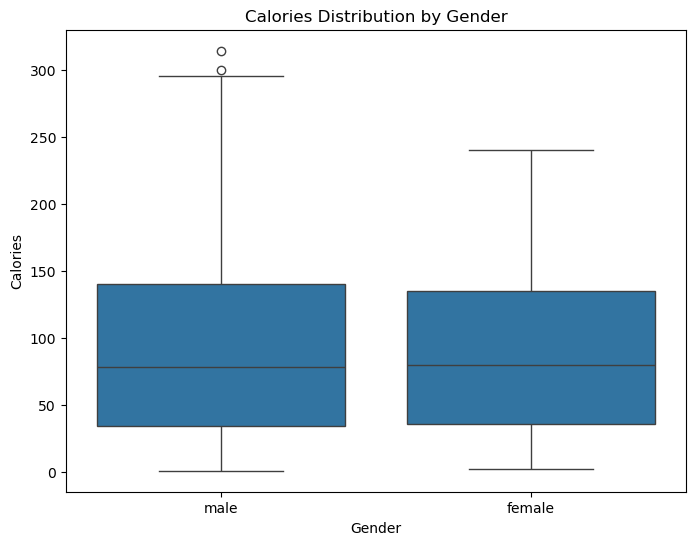

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x='Gender', y='Calories')
plt.title('Calories Distribution by Gender')
plt.show()


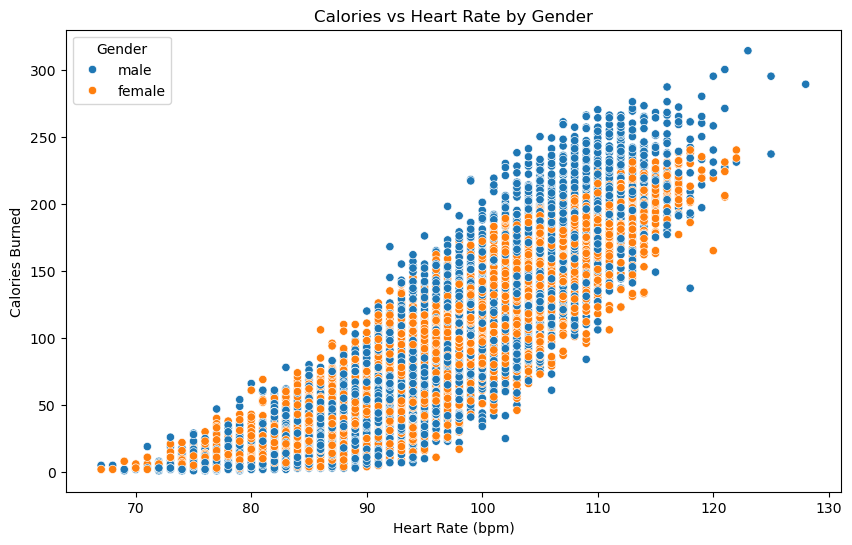

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Heart_Rate', y='Calories', hue='Gender')
plt.title('Calories vs Heart Rate by Gender')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Calories Burned')
plt.show()


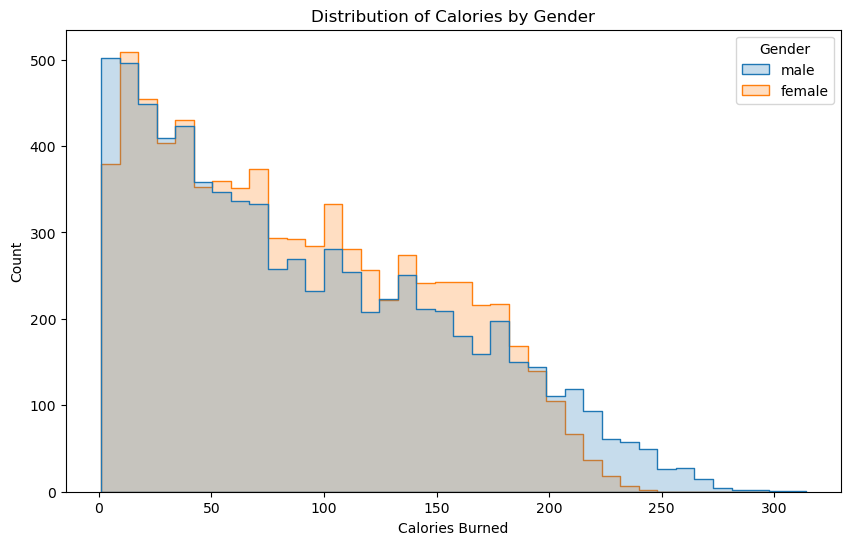

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='Calories', hue='Gender', element='step')
plt.title('Distribution of Calories by Gender')
plt.xlabel('Calories Burned')
plt.show()


In [36]:
gender_group = merged_df.groupby('Gender').agg({
    'Calories': 'mean',
    'Duration': 'mean',
    'Heart_Rate': 'mean',
    'Body_Temp': 'mean',
    'Weight': 'mean',
    'Height': 'mean',
    'Age': 'mean'
}).round(2)

print("\nAverage Metrics by Gender:")
print(gender_group)



Average Metrics by Gender:
        Calories  Duration  Heart_Rate  Body_Temp  Weight  Height    Age
Gender                                                                  
female     88.15     15.50       95.41      40.02   63.27  164.41  42.74
male       90.95     15.56       95.63      40.03   86.83  184.67  42.84


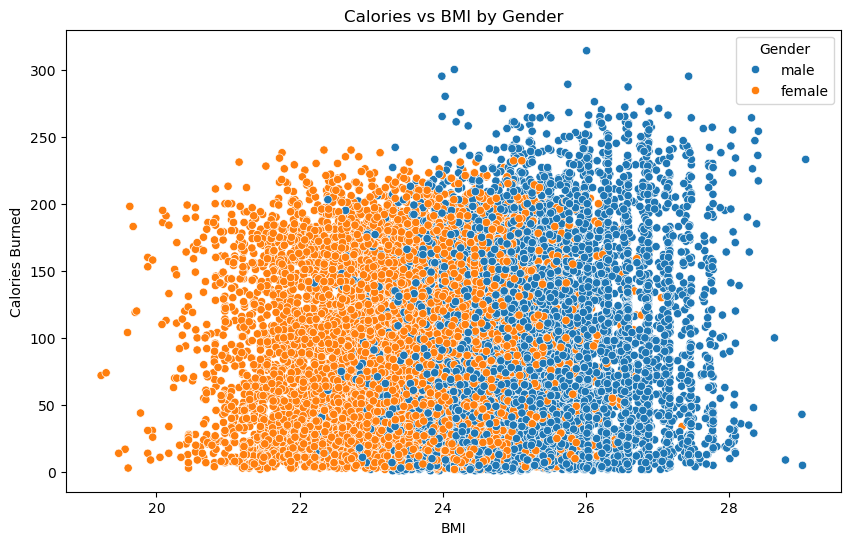

In [37]:
merged_df['BMI'] = merged_df['Weight'] / ((merged_df['Height']/100) ** 2)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='BMI', y='Calories', hue='Gender')
plt.title('Calories vs BMI by Gender')
plt.xlabel('BMI')
plt.ylabel('Calories Burned')
plt.show()


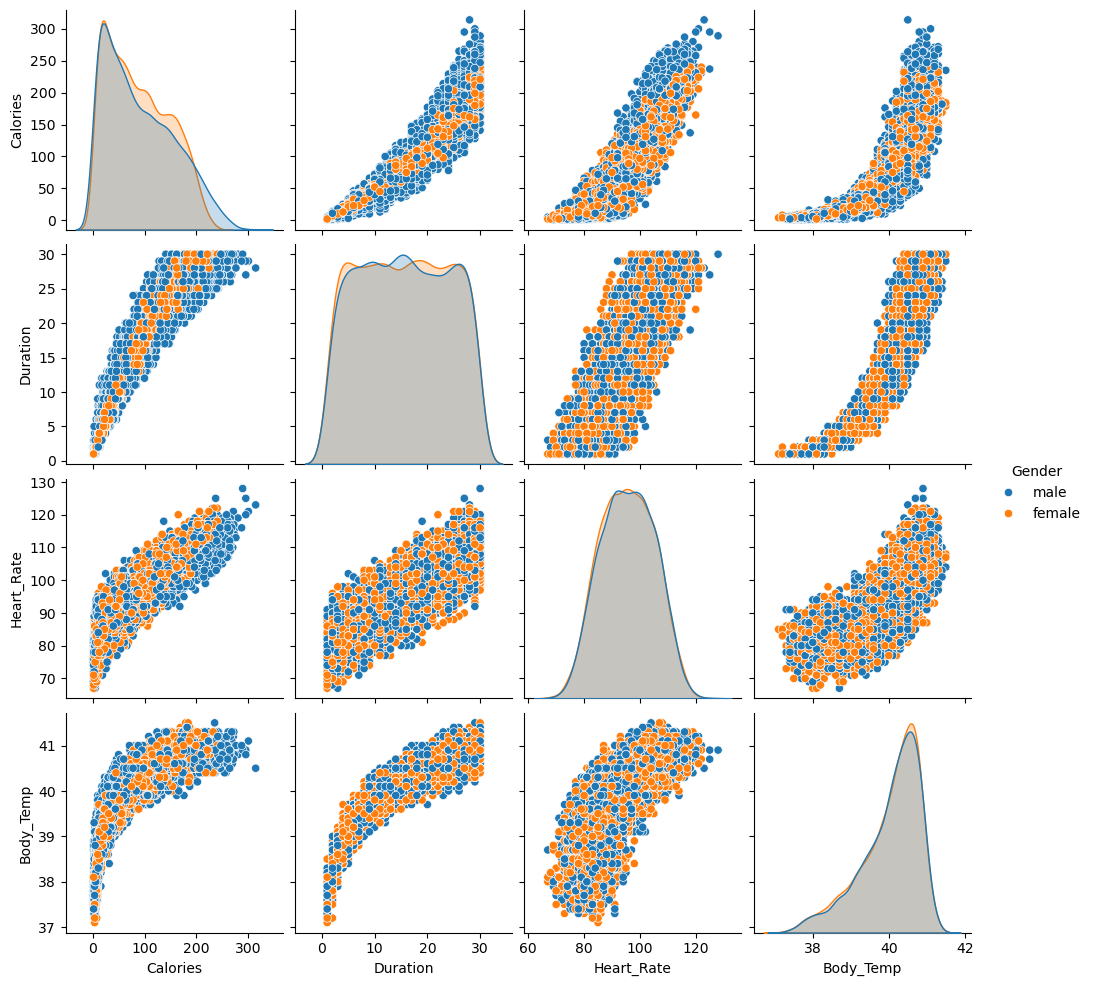

In [40]:
sns.pairplot(merged_df[['Calories', 'Duration', 'Heart_Rate', 'Body_Temp', 'Gender']], 
             hue='Gender')
plt.show()